<img src="https://bjcardio.co.uk/wp-content/uploads/2020/04/BANNER-Heart-Failure.jpg" alt="Heart Failure" style="margin:auto">

<a id="Table-Of-Contents"></a>
# Table Of Contents

- [Table Of Contents](#Table-Of-Contents)
- [Introduction](#Introduction)
- [Importing Relevant Components](#Importing-Relevant-Components)
- [Data Preprocessing](#Data-Preprocessing)
- [Training Machine Learning Models](#Training-Machine-Learning-Models)
- [Results](#Results)
- [Pipeline](#Pipeline)

<a id="Introduction"></a>
# Introduction

In general, Cadiovascular disease (CVD) is a term that refers to any disease of the heart or blood vessels. According to a research article written by Davide Chicco and Giuseppe Jurman, CVDs kill approximately 17 million people globally every year <a href="https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5">[ref]</a>. Heart failure is just one common event caused by CVDs. Heart failure is a chronic condition wherein the heart can no longer naturally pump (systolic) or fill (diastolic) adequately. Symptoms of heart failure include shortness of breath, fatigue, swollen legs, and rapid heartbeat. Treatments can include eating less salt, limiting fluid intake, and taking prescription medications. In some cases a defibrillator or pacemaker may be implanted.

It is imperative that individuals diagnoised with a CVD, or those at a high risk of a CVD, are exposed to early detection and management when it comes to heart health. Available electronic medical records of patients quantify symptoms, body features, clinical laboratory test values, etc. which can be used to perform biostatistics analysis aimed at detecting patterns and correlations. Machine learning, in this regard, can be a powerful tool that aids medical professionals.

The goal of this project is to develop a machine learning model that can predict the occurence of heart failure, given certain input data. The dataset used for this purpose was attained from <a href="https://www.kaggle.com/fedesoriano/heart-failure-prediction"> Kaggle</a> and is described below.

<ul>
    <li>Total observations: 918</li>
    <li>Total attributes: 12</li>
</ul>

<ol>
    <li><b>Age:</b> Age of the patient [years]</li>
    <li><b>Sex:</b> Sex of the patient [M: Male, F: Female]</li>
    <li><b>ChestPainType:</b> Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</li>
    <li><b>RestingBP:</b> Resting blood pressure [mm Hg]</li>
    <li><b>Cholesterol:</b> Serum cholesterol [mm/dl]</li>
    <li><b>FastingBS:</b> Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
    <li><b>RestingECG:</b> Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</li>
    <li><b>MaxHR:</b> Maximum heart rate achieved [Numeric value between 60 and 202]</li>
    <li><b>ExerciseAngina:</b> Exercise-induced angina [Y: Yes, N: No]</li>
    <li><b>Oldpeak:</b> Oldpeak = ST [Numeric value measured in depression]</li>
    <li><b>ST_Slope:</b> Slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
    <li><b>HeartDisease:</b> Target class [1: heart disease, 0: Normal]</li>
</ol>

<a id="Importing-Relevant-Components"></a>
# Importing Relevant Components

<h2>Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

The libraries for various models and pipelining will be imported as and when required.

<h2>Dataset</h2>

In [2]:
data = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<a id="Data-Preprocessing"></a>
# Data Preprocessing

Data preprocessing is the stage in the data mining and data analysis pipeline that takes raw data and transforms it into a format that can be understood and analyzed by computers and machine learning algorithms. As the popular aphorism goes... "Garbage in, garbage out." The measure of a created model will be highly dependant on the data used to create it. Ergo, this is a crucial step in the data analysis pipeline and is, in fact, the most arduous phase.

Data preprocessing can be further segmented into the following stages: 
<ul>
    <li><b>Data quality assessment:</b> Taking a good look at your data and getting an idea of its overall quality, relevance to your project, and consistency. Examples of characteristics to look out for are mismatched data types, mismatched data values, missing values, outliers, etc. </li>
    <li><b>Data cleaning:</b> Process of adding missing data and correcting, repairing, or removing incorrect or irrelevant data from a data set. </li>
    <li><b>Data transformation:</b> Process of converting data into the proper format(s) needed for analysis and other downstream processes. Examples of procedures include aggregation, normalization, and feature selection.</li>
    <li><b>Data reduction:</b> Process of removing unwanted/unneccessary data, the existence of which could be counterproductive and a burden to store. Procedures include attribute selection and dimensionality reduction.</li>
</ul>

During the preprocessing phase, it would be helpful to study the data. This is done using exploratory data analysis (EDA). EDA refers to the critical process of performing initial investigations on data so as to discover patterns, spot anomalies, test hypothesis, and check assumptions with the help of summary statistics and graphical representations.

<b>Cardinality and degree of dataset</b>

In [3]:
data.shape

(918, 12)

Ergo, the dataset contains 918 rows of data and 12 columns of attributes.

<b>Data type of each attribute</b>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The dtype 'object' refers to any non-numeric entity. In this case, they are all string values. In order to use this information, it must be converted to the string format.

In [5]:
object_cols = data.select_dtypes(include="object").columns
data[object_cols] = data[object_cols].astype("string")
data.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

We will now create two lists housing the categorical and numerical columns for further possible use.

Target field: HeartDisease

Categorical fields: These fields have a certain fixed number of valid inputs. May be nominal, ordinal, ratio-based, or interval-based.
<ul>
    <li>Sex</li>
    <li>ChestPainType</li>
    <li>RestingECG</li>
    <li>ExerciseAngina</li>
    <li>ST_Slope</li>
</ul>

Continuous fields: These fields have any number of valid inputs within theoretical minimum and maximum values.
<ul>
    <li>Age</li>
    <li>RestingBP</li>
    <li>Cholesterol</li>
    <li>FastingBS</li>
    <li>MaxHR</li>
    <li>Oldpeak</li>
</ul>

In [6]:
categorical_cols = list(data.select_dtypes(include="string").columns)
print(categorical_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [7]:
numerical_cols = list(data.select_dtypes(exclude="string").columns)
print(numerical_cols)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


<b>Unique values in each column</b>

In [8]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

<b>Statistical distribution</b>

In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
data.describe(include="string")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


<b>Correlation between attributes</b>

In [11]:
data.corr(method="pearson", numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Text(0.5, 1.0, 'Correlation of numerical attributes with HeartDisease')

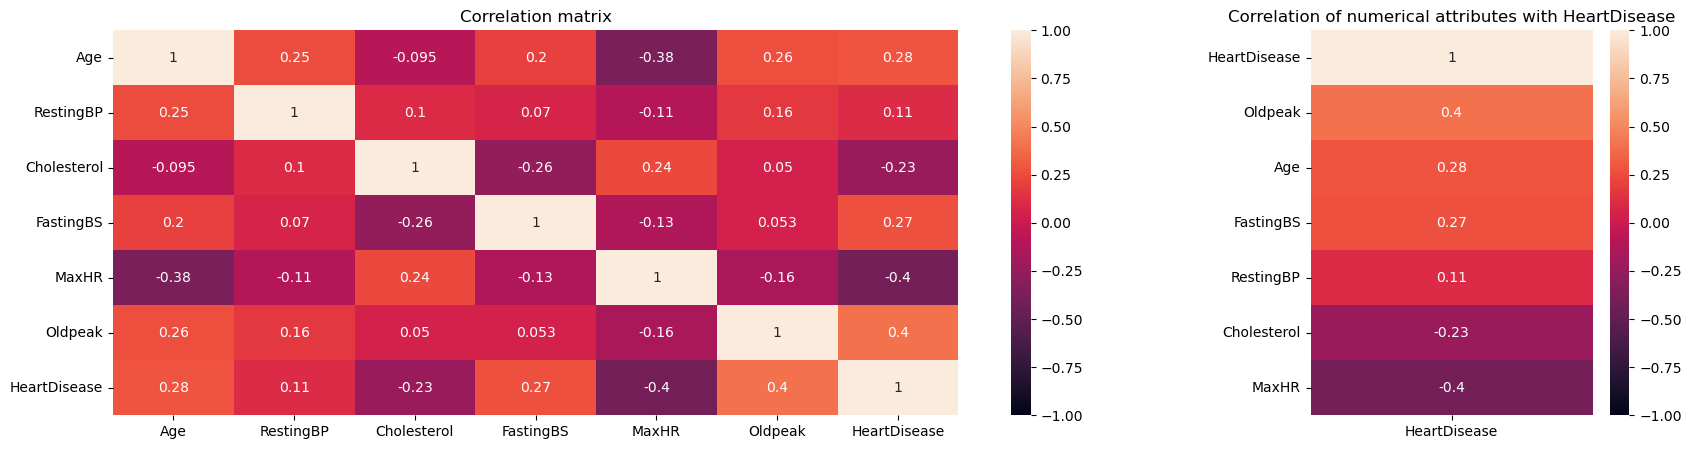

In [12]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=data.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=data.corr(method="pearson", numeric_only=True)[["HeartDisease"]].sort_values('HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with HeartDisease")

The correlation of attributes is depicted using both a table and visuals. Some of the conclusions that can be drawn are:
<ul>
    <li>HeartDisease has a comparatively strong positive correlation with Oldpeak, moderate positive correlation with Age and FastingBS, and weak positive correlation with RestingBP.</li>
    <li>HeartDisease has a comparatively strong negative correlation with MaXHR and moderate negative correlation with Cholestrol.</li>
    <li>MaxHR has a comparatively strong negative correlation with Age.</li>
    <li>Cholesterol has practically no correlation to Age.</li>
</ul>

<b>Distribution of HeartDisease</b>

In [13]:
data_holder = pd.DataFrame(data.HeartDisease.value_counts())
data_holder.columns = ["Count"]
data_holder["Percentage"] = (data_holder["Count"] / data_holder["Count"].sum()) * 100
print(data_holder)

   Count  Percentage
1    508   55.337691
0    410   44.662309


Text(0.5, 1.0, 'Distribution of target class')

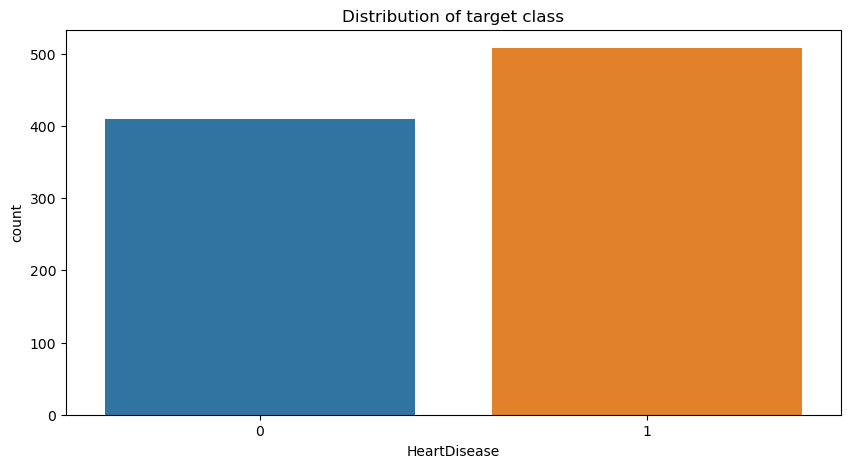

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x="HeartDisease", data=data)
plt.title("Distribution of target class")

The dataset has 508 positive cases and 410 negative cases which translates to a distribution of approximately 55% and 45% respectively. 

<b>Distribution of various attributes</b>

In [15]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="Age", nbins=15, title="Distribution of Age")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

plt.figure(figsize=(20, 10))
fig = px.box(data_frame=data, x="Age", title="Boxplot of Age")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [16]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="Sex", title="Distribution of Sex")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

It is apparent that there is a disproportionality in the Sex attribute. This could result in a bias (representation bias) after deployment.

In [17]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="ChestPainType", title="Distribution of ChestPain Type")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [18]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="RestingBP", title="Distribution of RestingBP")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

plt.figure(figsize=(20, 10))
fig = px.box(data_frame=data, x="RestingBP", title="Boxplot of RestingBP")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

While noticeable in the histogram itself, the boxplot clearly indicates the presence of outliers. Removing ooutliers would improve the model.

In [19]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="Cholesterol", title="Distribution of Cholesterol")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

plt.figure(figsize=(20, 10))
fig = px.box(data_frame=data, x="Cholesterol", title="Boxplot of Cholesterol")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [20]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="FastingBS", title="Distribution of FastingBS")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [21]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="RestingECG", title="Distribution of RestingECG")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [22]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="MaxHR", title="Distribution of MaxHR")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

plt.figure(figsize=(20, 10))
fig = px.box(data_frame=data, x="MaxHR", title="Boxplot of MaxHR")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [23]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="ExerciseAngina", title="Distribution of ExerciseAngina")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [24]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="Oldpeak", title="Distribution of Oldpeak")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

plt.figure(figsize=(20, 10))
fig = px.box(data_frame=data, x="Oldpeak", title="Boxplot of Oldpeak")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [25]:
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=data, x="ST_Slope", title="Distribution of ST_Slope")
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<b>Handling missing values</b>

In [26]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

As can be seen from the table above, there are no columns that have empty rows in them. If there were columns with null values, possible approaches involve:
<ul>
    <li>Drop columns with null values.</li>
    <li>Drop rows with null values.</li>
    <li>Use imputation to fill in missing values.</li>
</ul>

<b>Handling categorical values</b>

Categorical data are those that take only a limited number of inputs. They can be further segmented as given below:
<ul>
    <li><b>Nominal:</b> Does not have an inherent logical order. Ex: Gender</li>
    <li><b>Ordinal:</b> Contains an inherent logical order.Ex: Education level</li>
</ul>

While not always the case, some categorical data is in the form of textual input. Computers do not work with textual data while fitting models and thus such data must be converted appropriately. Two common approaches are given below:
<ul>
    <li><b>Ordinal encoding:</b> Assigns each unique value to a different integer. This approach works great with ordinal values since it assumes an indisputable ranking to the categories. Works well for tree-based models.</li>
    <li><b>One-hot encoding:</b> Creates new columns to indicate the presence/absence of each possible value in the original data. This approach works great for nominal data but can impede performance when the categorical variable takes on many values. A solution to this is to perform PCA after encoding.</li>
</ul>

In our dataset, some of the categorical columns are already integer based. We will only be converting the string columns.

In [27]:
print(categorical_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [28]:
for col in categorical_cols:
    print("The input values in {} are:".format(col))
    print(data[col].value_counts())
    print("\n")

The input values in Sex are:
M    725
F    193
Name: Sex, dtype: Int64


The input values in ChestPainType are:
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64


The input values in RestingECG are:
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64


The input values in ExerciseAngina are:
N    547
Y    371
Name: ExerciseAngina, dtype: Int64


The input values in ST_Slope are:
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64




Before transforming:

In [29]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


After transforming:

In [30]:
ordinal_encoder = OrdinalEncoder()
data[categorical_cols] = ordinal_encoder.fit_transform(data[categorical_cols])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


<b>Note:</b> For ordinal values, we could use either an Ordinal Encoder or Label encoder. Normally, Label Encoder takes a 1-D array as input and is usually reserved for the target attribute. Ordinal Encoder can take a multidimensional array as input and is used for the other attributes.

As can be seen, the text fields have been converted into numeric input. As a note, it is important to realize that even though the fields do not have an inherent ordering, an ordinal encoder was used. It is permitted here as, in this particular instance, the net outcome is the same.

<b>Feature Scaling</b>

Feature scaling is a data preprocessing technique used to transform the values of a feature or variable in a dataset. It is especially important when building machine learning models that rely on distance metrics. Tree-based algorithms are invariant to the scale of the features. The two most prominant scaling techniques are:

<ul>
    <li><b>Scaling:</b> Changes the range of the data.</li>
    <img src="https://androidkt.com/wp-content/uploads/2023/05/Selection_060.png" alt="Scaling" style="margin:auto; height:100px">
    <li><b>Standardization or (Z-Score) Normalization:</b> Changes the distribution of the data.</li>
    <img src="https://www.spreadsheetweb.com/wp-content/uploads/2020/07/How-to-normalize-data-in-Excel-011-980x234.png" alt="Normalization" style="margin:auto; height:80px">
</ul>

We will use scaling in our application. Since this technique has a negligeable impact on non-distance based algorithms, we could essentially not deploy it for such algorithms. However, to draw better comparisons, we will use the same dataset to build various models. Before scaling:

In [31]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


After scaling:

In [32]:
scaler = MinMaxScaler()
columns = data.columns
data = pd.DataFrame(scaler.fit_transform(data))
data.columns = columns
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0,0.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5,1.0
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0,0.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5,1.0
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0,0.0


<a id="Training-Machine-Learning-Models"></a>
# Training Machine Learning Models

The models we will be creating are:
<ol>
    <li>Decision Tree Classifier</li>
    <li>Random Forest Classifier</li>
    <li>XGBoost Classifier</li>
    <li>Naive Bayes Classifier</li>
    <li>Logistic Regression Classifier</li>
    <li>Support Vector Machine (SVM) Classifier</li>
    <li>K-Nearest Neighbor (KNN) Classifier</li>
</ol>

<b>Segmenting the data into training and testing datasets</b>

In [33]:
attributes = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"]
X = data[attributes]
y = data.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<b>Decision tree classifier</b>

A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" alt="Decision Tree">

The mean absolute error:
0.1826086956521739

Accuracy score:
0.8173913043478261

Classification report: 
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78        92
         1.0       0.86      0.83      0.85       138

    accuracy                           0.82       230
   macro avg       0.81      0.81      0.81       230
weighted avg       0.82      0.82      0.82       230


Confusion matrix: 
[[ 73  19]
 [ 23 115]]



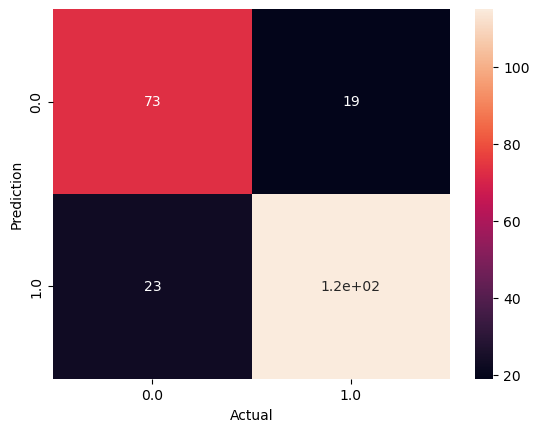

In [34]:
#Importing the classifier
from sklearn.tree import DecisionTreeClassifier

#Creating and fitting the model, as well as generating predictions
decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=0)
decision_tree_model.fit(X_train, y_train)
preds = decision_tree_model.predict(X_test)

#Model evaluation
#Mean absolute error
print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
#Accuracy score
decision_tree_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(decision_tree_model_accuracy))
accuracies = pd.DataFrame({"Algorithm":["Decision Tree"], "Score":[decision_tree_model_accuracy]})
#Classification report
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
#Confusion matrix
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=decision_tree_model.classes_, yticklabels=decision_tree_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

The code block below aids in visualizing the tree formed.

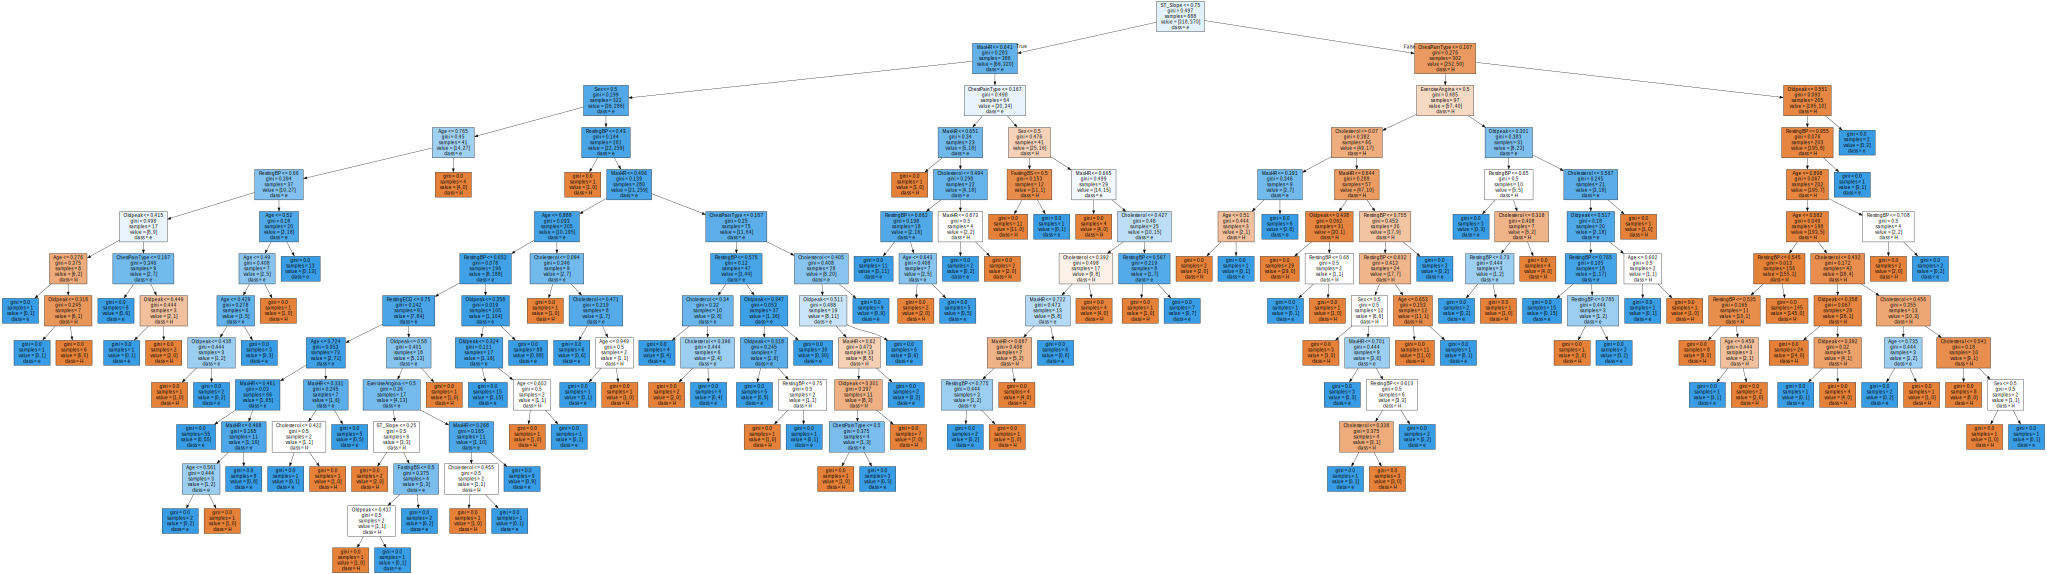

In [35]:
import graphviz
from sklearn import tree

graph_data = tree.export_graphviz(decision_tree_model, out_file=None, feature_names=attributes, class_names="HeartDisease", filled=True)
graphviz.Source(graph_data, format="png") 

<b>Random forest classifier</b>

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" alt="Random Forest">

The mean absolute error:
0.14782608695652175

Accuracy score:
0.8521739130434782

Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        92
         1.0       0.87      0.89      0.88       138

    accuracy                           0.85       230
   macro avg       0.85      0.84      0.84       230
weighted avg       0.85      0.85      0.85       230


Confusion matrix: 
[[ 73  19]
 [ 15 123]]



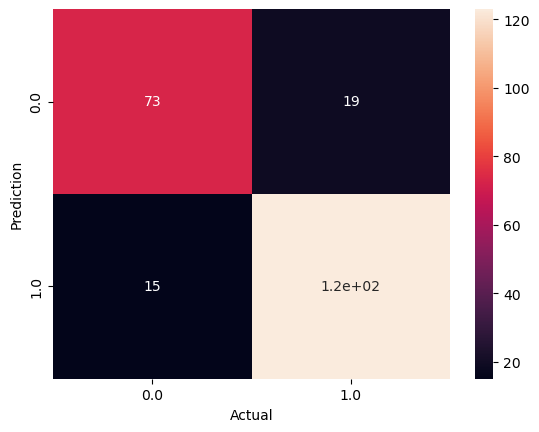

In [36]:
#Importing the classifier
from sklearn.ensemble import RandomForestClassifier

#Creating and fitting the model, as well as generating predictions
random_forest_model = RandomForestClassifier(n_estimators=200, criterion="gini", random_state=0)
random_forest_model.fit(X_train, y_train)
preds = random_forest_model.predict(X_test)

#Model evaluation
#Mean absolute error
print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
#Accuracy score
random_forest_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(random_forest_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"Random Forest", "Score":random_forest_model_accuracy}
#Classification report
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
#Confusion matrix
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

<b>XGBoost</b>

XGBoost is an implementation of Gradient Boosted decision trees. XGBoost models majorly dominate in many Kaggle Competitions. In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png" alt="XGBoost">

The mean absolute error:
0.14782608695652175

Accuracy score:
0.8521739130434782

Classification report: 
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81        92
         1.0       0.87      0.88      0.88       138

    accuracy                           0.85       230
   macro avg       0.85      0.84      0.85       230
weighted avg       0.85      0.85      0.85       230


Confusion matrix: 
[[ 74  18]
 [ 16 122]]



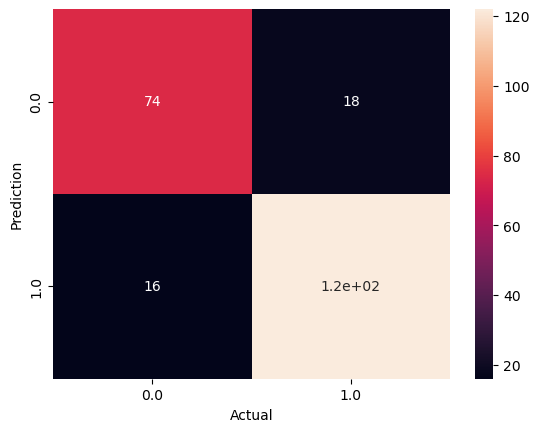

In [37]:
#Importing the classifier
from xgboost import XGBClassifier

#Creating and fitting the model, as well as generating predictions
XGB_model = XGBClassifier(random_state=0)
XGB_model.fit(X_train, y_train)
preds = XGB_model.predict(X_test)

#Model evaluation
#Mean absolute error
print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
#Accuracy score
XGB_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(XGB_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"XGBoost", "Score":XGB_model_accuracy}
#Classification report
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
#Confusion matrix
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=XGB_model.classes_, yticklabels=XGB_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

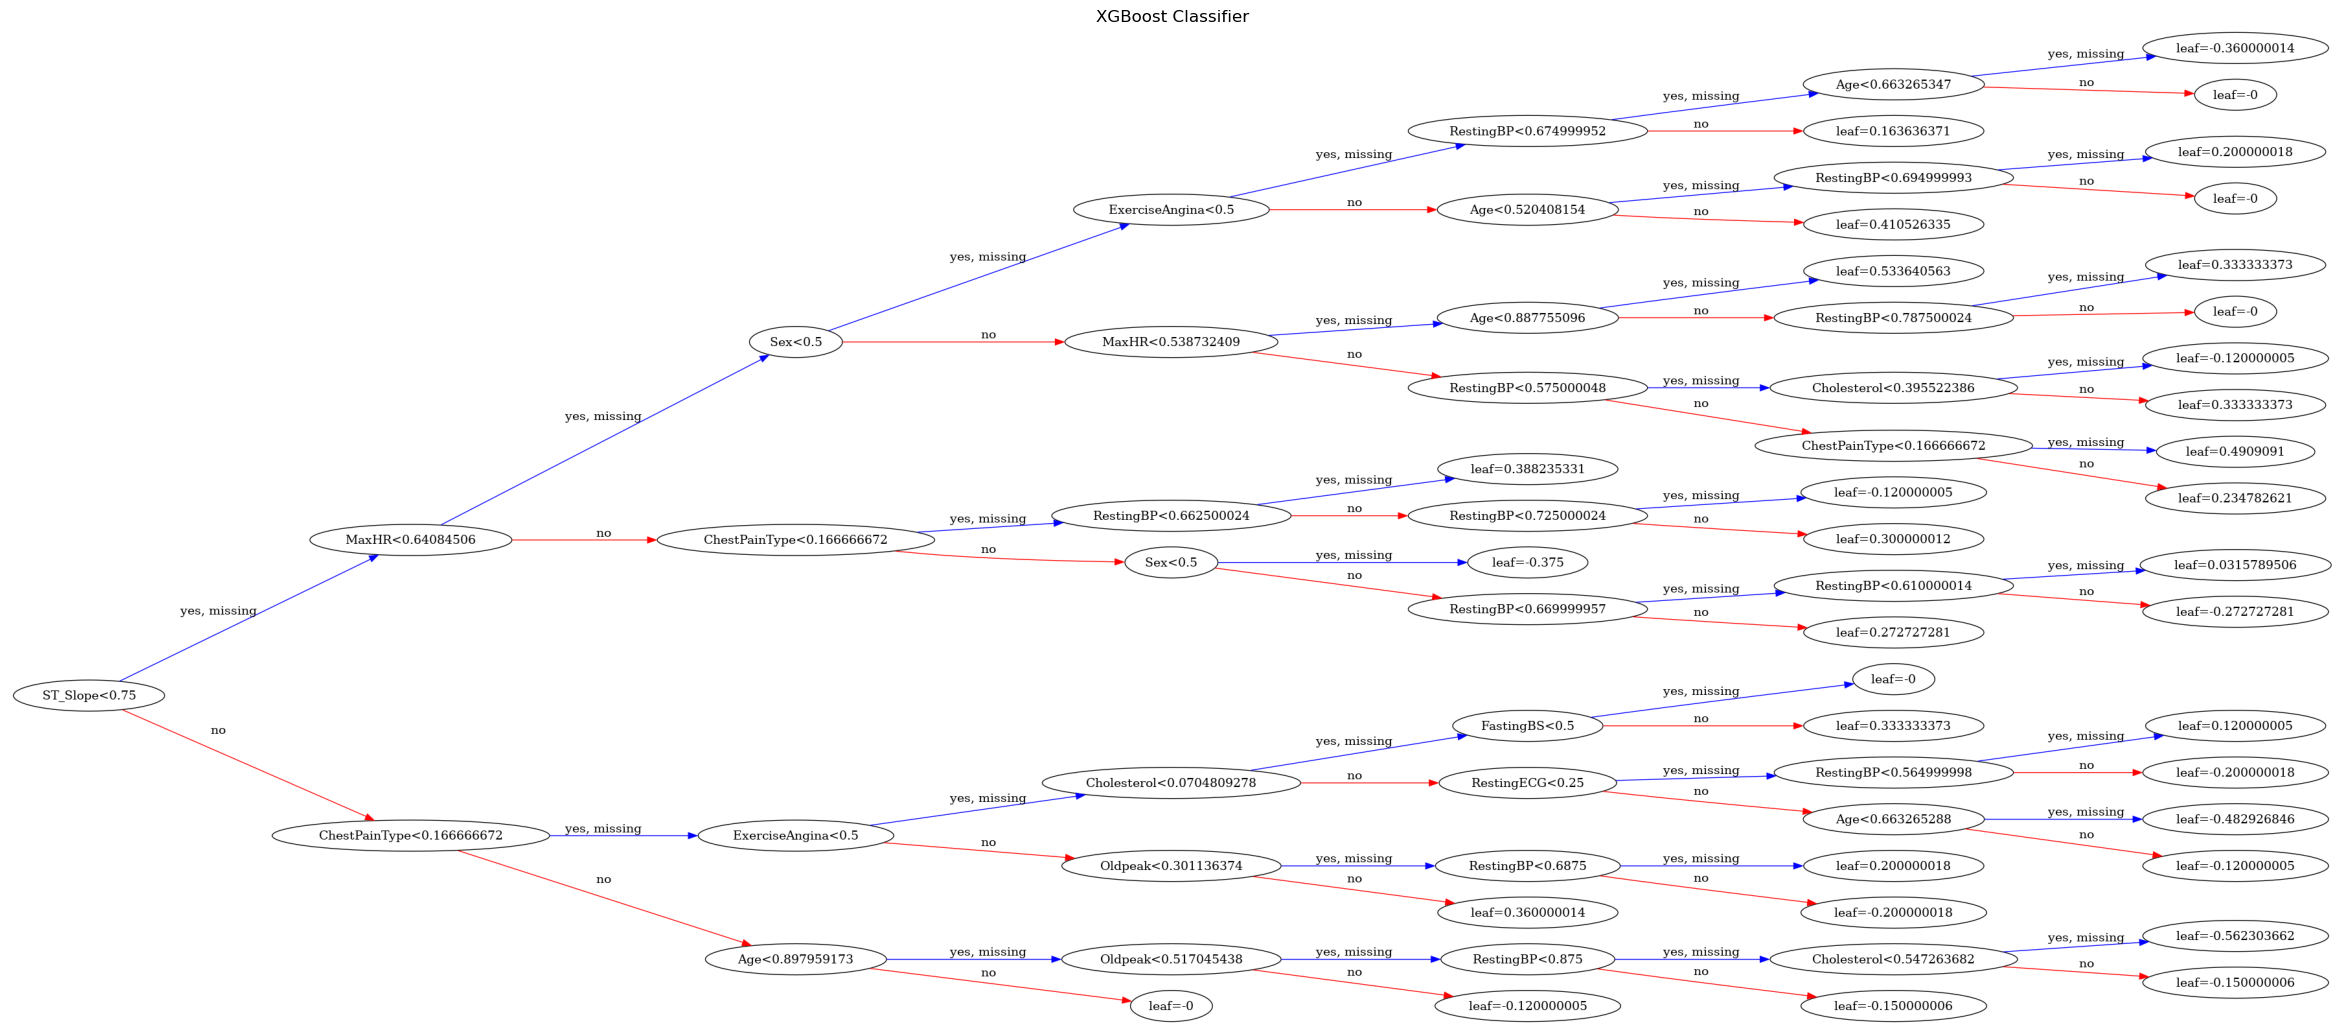

In [38]:
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(XGB_model, num_trees=0, rankdir="LR", ax=ax)
plt.title("XGBoost Classifier")
plt.show()

<b>Naive Bayes classifier</b>

A naive Bayes classifier uses probability theory to classify data. Naive Bayes classifier algorithms make use of Bayes' theorem. The key insight of Bayes' theorem is that the probability of an event can be adjusted as new data is introduced. What makes a naive Bayes classifier naive is its assumption that all attributes of a data point under consideration are independent of each other. This algorithm aims to maximize the formula below.

<img src="https://www.kdnuggets.com/wp-content/uploads/bayes-nagesh-1.jpg" alt="Naive Bayes">

The mean absolute error:
0.15217391304347827

Accuracy score:
0.8478260869565217

Classification report: 
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81        92
         1.0       0.87      0.88      0.87       138

    accuracy                           0.85       230
   macro avg       0.84      0.84      0.84       230
weighted avg       0.85      0.85      0.85       230


Confusion matrix: 
[[ 73  19]
 [ 16 122]]



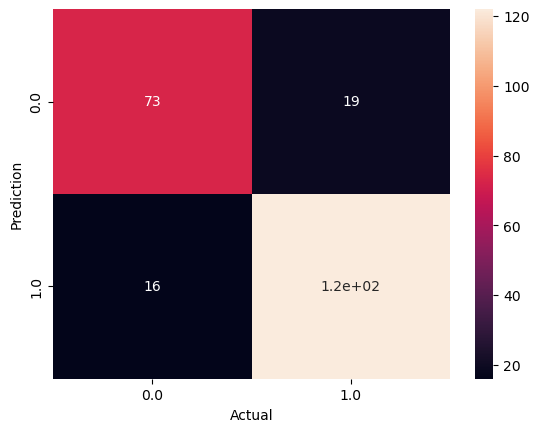

In [39]:
#Importing the classifier
from sklearn.naive_bayes import GaussianNB

#Creating and fitting the model, as well as generating predictions
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
preds = naive_bayes_model.predict(X_test)

#Model evaluation
#Mean absolute error
print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
#Accuracy score
naive_bayes_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(naive_bayes_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"Naive Bayes", "Score":naive_bayes_model_accuracy}
#Classification report
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
#Confusion matrix
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=naive_bayes_model.classes_, yticklabels=naive_bayes_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

<b>Logistic regression classifier</b>

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables. For example, a logistic regression could be used to predict whether a political candidate will win or lose an election or whether a high school student will be admitted or not to a particular college. These binary outcomes allow straightforward decisions between two alternatives.

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/3_logistic-regression-classification-algorithm.png" alt="Logistic Regression" style="height:500px">

The mean absolute error:
0.16521739130434782

Accuracy score:
0.8347826086956521

Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79        92
         1.0       0.85      0.88      0.87       138

    accuracy                           0.83       230
   macro avg       0.83      0.82      0.83       230
weighted avg       0.83      0.83      0.83       230


Confusion matrix: 
[[ 70  22]
 [ 16 122]]



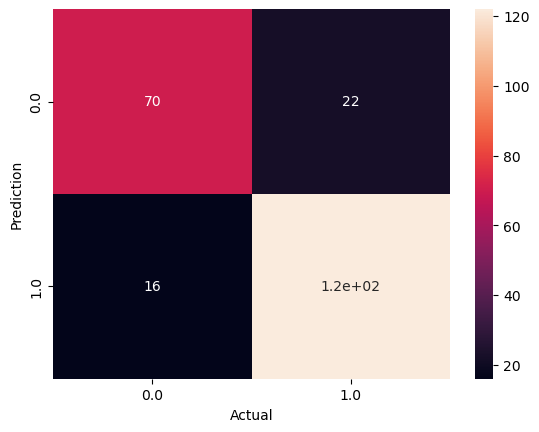

In [40]:
#Importing the classifier
from sklearn.linear_model import LogisticRegression

#Creating and fitting the model, as well as generating predictions
logistic_regression_model = LogisticRegression(random_state=0)
logistic_regression_model.fit(X_train, y_train)
preds = logistic_regression_model.predict(X_test)

#Model evaluation
#Mean absolute error
print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
#Accuracy score
logistic_regression_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(logistic_regression_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"Logistic Regression", "Score":logistic_regression_model_accuracy}
#Classification report
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
#Confusion matrix
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=logistic_regression_model.classes_, yticklabels=logistic_regression_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

<b>SVM classifier</b>

A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible. SVMs are used in text categorization, image classification, handwriting recognition and in the sciences.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png" alt="SVM">

The mean absolute error:
0.1565217391304348

Accuracy score:
0.8434782608695652

Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.80        92
         1.0       0.85      0.90      0.87       138

    accuracy                           0.84       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230


Confusion matrix: 
[[ 70  22]
 [ 14 124]]



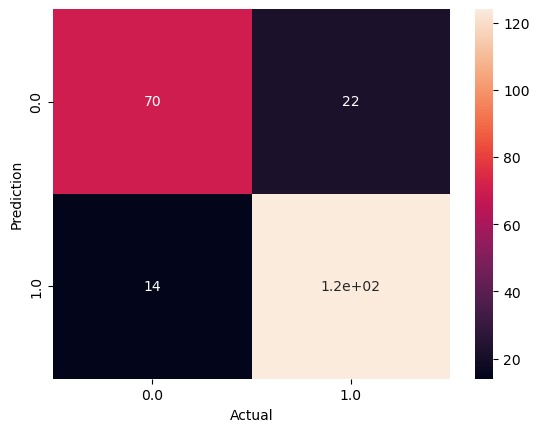

In [41]:
#Importing the classifier
from sklearn.svm import SVC

#Creating and fitting the model, as well as generating predictions
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

#Model evaluation
#Mean absolute error
print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
#Accuracy score
svm_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(svm_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"SVM", "Score":svm_model_accuracy}
#Classification report
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
#Confusion matrix
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

<b>KNN classifier</b>

A k-nearest-neighbor algorithm, often abbreviated KNN, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in. KNN is an example of a “lazy learner” algorithm since it does not build a model using the training set until a query of the data set is performed.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*hncgU7vWLBsRvc8WJhxlkQ.png" alt="KNN">

The mean absolute error:
0.1608695652173913

Accuracy score:
0.8391304347826087

Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80        92
         1.0       0.86      0.87      0.87       138

    accuracy                           0.84       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230


Confusion matrix: 
[[ 73  19]
 [ 18 120]]



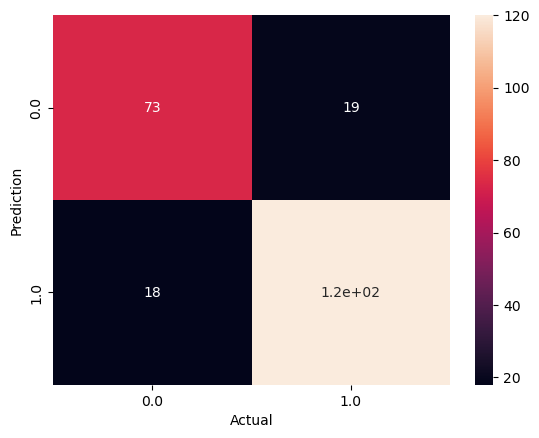

In [42]:
#Importing the classifier
from sklearn.neighbors import KNeighborsClassifier

#Creating and fitting the model, as well as generating predictions
knn_model = KNeighborsClassifier(n_neighbors=20, metric="minkowski")
knn_model.fit(X_train, y_train)
preds = knn_model.predict(X_test)

#Model evaluation
#Mean absolute error
print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
#Accuracy score
knn_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(knn_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"KNN", "Score":knn_model_accuracy}
#Classification report
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
#Confusion matrix
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

<a id="Results"></a>
# Results

When evaluating models, there are a few key metrics to inspect. These metrics have been evaluated for each model above and are discribed here. 

The most common metrics used for model evaluation are:
<ul>
    <li><b>Mean absolute error:</b> The average absolute difference between the actual values and predicted values.</li>
    <img src="https://editor.analyticsvidhya.com/uploads/42439Screenshot%202021-10-26%20at%209.34.08%20PM.png" alt="MAE" style="margin:auto; height:100px">
    <li><b>Accuracy:</b> The fraction of predictions the model got right.</li>
    <li><b>Precision:</b> The fraction of predicted positives that are actually positive. It is a good metric to consider when the weight of a false positive is high, e.g., in spam email classifier. The higher the precision, the less the model is wrong on the positives.</li>
    <li><b>Recall:</b> The fraction of actual positives that are captured by the model and labelled as positive. It is a good metric to consider when the weight of a false negative is high, e.g., in fraud detection. The higher the recall, the more positives the model finds.</li>
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*pOtBHai4jFd-ujaNXPilRg.png" alt="Image" style="height:300px">
    <li><b>F1-score:</b> A combinatorial measure of precision and recall. It is a good measure to use when there is a need to seek balance between Precision and Recall and when there is an uneven class distribution (large number of Actual Negatives).</li><img src="https://inside-machinelearning.com/wp-content/uploads/2021/09/F1-Score.png" alt="F1-Score" style="height:100px">
</ul>

Evaluating a model demands a wholistic approach wherein multiple metrics are investigated and compared. For the sake of simplicity, accuracy score will be the metric of comparison used. In this application, the Random Forest and XGBoost models had the highest accuracy scores.

In [43]:
plt.figure(figsize=(20, 10))
fig = px.bar(data_frame=accuracies, x="Algorithm", y="Score", title="Accuracy Score of Various Algorithms", range_y=[0.5, 1.0],)
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

<a id="Pipeline"></a>
# Pipeline

Pipelines provide a simplified approach to maintain the organization of the data preprocessing and modeling code. Specifically, pipelines amalgamate the preprocessing and modelling steps so as to appear as a single step. Benefits of using pipelines include:

<ul>
    <li>Cleaner code</li>
    <li>Fewer bugs</li>
    <li>Easier to convert to production</li>
</ul>

The pipeline approach can be segmented into three steps:

<ul>
    <li>Define preprocessing steps</li>
    <li>Define the model</li>
    <li>Create and evaluate the pipeline</li>
</ul>

There are two important functions to understand, when it comes to pipelines. These are:

<ul>
    <li><b>Pipeline:</b> A function that links all steps of data manipulation and model fitting together to create a pipeline.</li>
    <li><b>ColumnTransformer:</b> A function that will transform each group of dataframe columns separately and combine them later.</li>
</ul>

There is a huge difference between Pipeline and ColumnTransformer that must be understood. Pipeline is used for multiple serial transformations of the same column(s). Dissimilarly, the ColumnTransformer is used for multiple parallel transformations of each column set separately before combining them.

<img src="https://miro.medium.com/max/1190/1*I0F-ALOL8J8f6V33CDKyrA.png" alt="Difference between pipeline and column transformer">

The mean absolute error:
0.14347826086956522

Accuracy score:
0.8565217391304348

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        92
           1       0.87      0.90      0.88       138

    accuracy                           0.86       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.86      0.86      0.86       230


Confusion matrix: 
[[ 73  19]
 [ 14 124]]



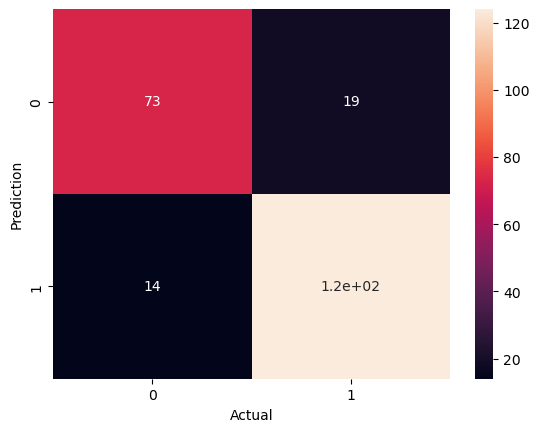

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Read the data
data = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
data.head()

# Creating the train and test datasets
attributes = ["Age", "Sex", "ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "RestingECG", "MaxHR", "ExerciseAngina", "Oldpeak", "ST_Slope"]
X = data[attributes]
y = data.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Gathering categorical and numerical columns
categorical_cols = list(data.select_dtypes(include="object").columns)
numerical_cols = list(data.select_dtypes(exclude="object").columns)
numerical_cols.remove("HeartDisease")

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("Ordinal encoder", OrdinalEncoder()),
    ("Scaler", MinMaxScaler())
])

# Preprocessing for numerical data
numerical_transformer = MinMaxScaler()

# Bundling the preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ("Categorical", categorical_transformer, categorical_cols),
    ("Numerical", numerical_transformer, numerical_cols)
])

# Defining the model
random_forest_model = RandomForestClassifier(n_estimators=200, criterion="gini", random_state=0)

# Bundling the preprocessing and modeling steps
pipeline = Pipeline(steps=[
    ("Preprocessing", preprocessor),
    ("Modeling", random_forest_model)
])

# Fitting the model and getting predictions
pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

#Model evaluation
#Mean absolute error
print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
#Accuracy score
random_forest_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(random_forest_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"Random Forest", "Score":random_forest_model_accuracy}
#Classification report
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
#Confusion matrix
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

The pipeline is working as intended and the model performed with an accuracy similar to the Random Forest model trained in the previous section. However, the code is drastically shorter and simpler. Furthermore, once the pipeline was created, the training and testing datasets did not have to be manually preprocessed.